# Simple Linear Regression using Gradient Descent
In the following programm we randomly generate a dataset consisting of 1 dependent variable
and 1 independent variable. With the use of Gradient Descent we will find the regression coefficients
that minimize the Cost Function J of theta. Subsequently, we will compare this solution with the actual
regression line calculated with numpy polyfit

In [95]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from random import randint
from sklearn.datasets.samples_generator import make_regression

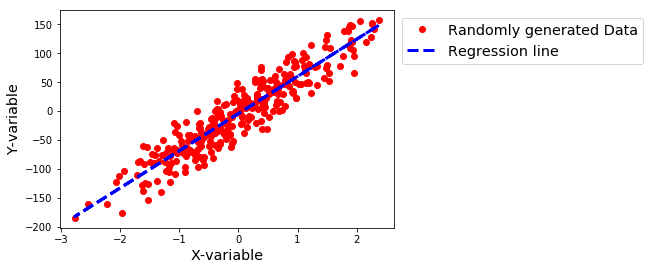

In [96]:
# ========== Part 2: generating a dataset with make_regression

X,y = make_regression(n_samples=300,n_features=1,n_targets=1,noise=25.0,shuffle=True,coef=False,random_state=0)
df = pd.DataFrame(data=X,columns = ['X'])
df['y'] = y

X = df['X']
y = df['y']

m,b = np.polyfit(X,y,1)

fig = plt.figure()
%matplotlib inline
plt.plot(X,y,'ro',markersize=6, label = 'Randomly generated Data')
plt.xlabel('X-variable',fontsize='x-large')
plt.plot(X,m*X+b,'b--', linewidth = 3, label = 'Regression line')
plt.ylabel('Y-variable',fontsize ='x-large')
legend = plt.legend(loc = 'best', bbox_to_anchor = (1,1,0,0), fontsize = 'x-large')
plt.show();

In [97]:
# ========== Part 3: calculating the cost J of theta
m = len(y)
# adding bias unit to X matrix
X_padded = np.column_stack((np.ones((m,1)),X))
theta = np.zeros((X_padded.shape[1],1))

class CC(object):
    def ComputeCost(self,X,y,theta):
        m = len(y)
        # calculating the Cost J of theta
        J = 0
        sqr_err = np.power((X_padded.dot(theta)-np.transpose([y])),2)
        J = (1.0/(2*m)) * sqr_err.sum(axis=0)
        return J

print('Initial Cost J of theta is \n')
print(CC().ComputeCost(X_padded,y,theta))

Initial Cost J of theta is 

[2375.03416815]


In [98]:
# ========== Part 4: Gradient Descent (GD) Algorithm to find regression coefficients that minimize cost function J
alpha = 0.02
epochs = 5000
J_history = []
iteration_nr = []

class GD(object):
    def GradientDescent(self,alpha,epochs):
        theta = np.zeros((X_padded.shape[1],1))
        n = float(len(y))
        
        for i in range(epochs):
            J = 0
            sqr_err = np.power((X_padded.dot(theta)-np.transpose([y])),2)
            J = (1.0/(2*n)) * sqr_err.sum(axis=0)
            iter = i+1
            J_history.append(J)
            iteration_nr.append(iter)
            
            #update theta values
            gradient = (1/n) * X_padded.T.dot(X_padded.dot(theta)-np.transpose([y]))
            theta = theta - alpha * gradient 
            
        return theta
    
print('The Gradient Descent Algorithm converged on the following theta values \n')
print(GD().GradientDescent(alpha,epochs))
final_theta = GD().GradientDescent(alpha,epochs)

The Gradient Descent Algorithm converged on the following theta values 

[[-4.18627662]
 [64.29443431]]


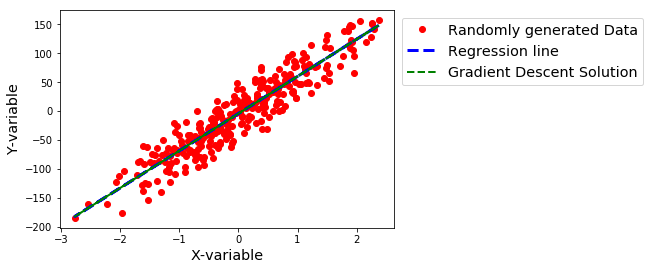

In [99]:
# Plotting the solution of the Gradient Descent Algorithm

m,b = np.polyfit(X,y,1)

fig = plt.figure()
%matplotlib inline
plt.plot(X,y,'ro',markersize=6, label = 'Randomly generated Data')
plt.plot(X,m*X+b,'b--', linewidth = 3, label = 'Regression line')
plt.plot(X,final_theta[1]*X+final_theta[0],'g--',linewidth = 2, label = 'Gradient Descent Solution')
plt.xlabel('X-variable',fontsize ='x-large')
plt.ylabel('Y-variable',fontsize ='x-large')
legend = plt.legend(loc = 'best', bbox_to_anchor = (1,1,0,0), fontsize = 'x-large')
plt.show();